数据集 最严谨顺序 切分->填充->转码

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 解决坐标轴刻度负号或乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

## 导入数据

In [2]:
data00 = pd.read_csv('./data/ma_resp_data_temp.csv')
feature_dict = pd.read_excel('./保险案例数据字典.xlsx')
data_01 = data00.copy()

## 探索数据

In [3]:
data_01.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


In [4]:
feature_dict

,变量名,type,变量说明,备注
0,KBM_INDV_ID,Num,Individual ID,NaN
1,resp_flag,Num,是否response,NaN
2,age,Num,年龄,NaN
3,GEND,Char,性别,NaN
4,c210mys,Num,学历,0-unknown; 1-初中；2-高中不到；3-高中毕业；4-大学未毕业；\n5-大专；6...
...,...,...,...,...
71,c210wht,Num,白领所占比例,值越大，说明比例越高
72,ilor,Num,所处地区居住年限,值越大，说明居住年限越长
73,KBM_INDV_ID,Num,Individual ID,NaN
74,pdpe,Num,所在地区处方药计划覆盖的比例,值越大，说明覆盖比例越高


### 处理列表签名异常

表中字段与数据字典不匹配

判断data_01中列标签名是否都出现在数据字典的变量名中

In [5]:
data_01.columns

Index(['KBM_INDV_ID', 'resp_flag', 'GEND', 'CA00', 'CA03', 'CA06', 'CA11',
       'CA16', 'AART', 'ADBT', 'ADEP', 'AHBP', 'AHCH', 'ARES', 'AHRT', 'AASN',
       'ADGS', 'AHRL', 'ASKN', 'AVIS', 'BANK', 'COLLEGE', 'FINI', 'INLI',
       'INMEDI', 'INVE', 'IOLP', 'MOBPLUS', 'N2NCY', 'NY8Y9', 'N2N29', 'N3N39',
       'N4N49', 'N5N59', 'N6N64', 'N65P', 'ONLA', 'POEP', 'SGFA', 'SGLL',
       'SGOE', 'SGSE', 'SGTC', 'U18', 'LIVEWELL', 'NOC19', 'NAH19', 'NPH19',
       'POC19', 'HOMSTAT', 'HINSUB', 'STATE_NAME', 'age', 'c210apvt',
       'c210b200', 'c210blu', 'c210bpvt', 'c210cip', 'c210ebi', 'c210hmi',
       'c210hva', 'c210kses', 'c210mah', 'c210mob', 'c210mys', 'c210pdv',
       'c210pmr', 'c210poo', 'c210psu', 'c210pwc', 'c210wht', 'ilor', 'meda',
       'pdpe', 'tins', 'zhip19'],
      dtype='object')

In [6]:
feature_dict['变量名']

0     KBM_INDV_ID
1       resp_flag
2             age
3            GEND
4         c210mys
         ...     
71        c210wht
72           ilor
73    KBM_INDV_ID
74           pdpe
75         zhip19
Name: 变量名, Length: 76, dtype: object

In [7]:
np.setxor1d(data_01.columns,feature_dict.变量名) # 补集找出不匹配的名称

array(['N1819', 'N2029', 'N2N29', 'N3039', 'N3N39', 'N4049', 'N4N49',
       'N5059', 'N5N59', 'N6064', 'N6N64', 'NY8Y9', 'meda'], dtype=object)

In [ ]:
# 数据表列标签
'NY8Y9', 'N2N29', 'N3N39', 'N4N49', 'N5N59', 'N6N64'

#数据字典
'N1819', 'N2029', 'N3039','N4049', 'N5059','N6064'

meda

In [8]:
# 删掉 meda
data_01['meda'].nunique()

75

替换异常标签

In [9]:
a = ['NY8Y9', 'N2N29', 'N3N39', 'N4N49', 'N5N59', 'N6N64']
b = ['N1819', 'N2029', 'N3039','N4049', 'N5059','N6064']

# 将要替换的列名称，做成映射字典
dic = dict(zip(a,b))
dic

{'NY8Y9': 'N1819',
 'N2N29': 'N2029',
 'N3N39': 'N3039',
 'N4N49': 'N4049',
 'N5N59': 'N5059',
 'N6N64': 'N6064'}

In [10]:
def tran(x):
    if x in dic:
        return dic[x]
    else:
        return x
    
tran = np.vectorize(tran) # 向量化 输入参数单个值--->可以处理多个 即单个x --> [] ,减少for循环

data_01.columns = tran(data_01.columns)
data_01.columns

Index(['KBM_INDV_ID', 'resp_flag', 'GEND', 'CA00', 'CA03', 'CA06', 'CA11',
       'CA16', 'AART', 'ADBT', 'ADEP', 'AHBP', 'AHCH', 'ARES', 'AHRT', 'AASN',
       'ADGS', 'AHRL', 'ASKN', 'AVIS', 'BANK', 'COLLEGE', 'FINI', 'INLI',
       'INMEDI', 'INVE', 'IOLP', 'MOBPLUS', 'N2NCY', 'N1819', 'N2029', 'N3039',
       'N4049', 'N5059', 'N6064', 'N65P', 'ONLA', 'POEP', 'SGFA', 'SGLL',
       'SGOE', 'SGSE', 'SGTC', 'U18', 'LIVEWELL', 'NOC19', 'NAH19', 'NPH19',
       'POC19', 'HOMSTAT', 'HINSUB', 'STATE_NAME', 'age', 'c210apvt',
       'c210b200', 'c210blu', 'c210bpvt', 'c210cip', 'c210ebi', 'c210hmi',
       'c210hva', 'c210kses', 'c210mah', 'c210mob', 'c210mys', 'c210pdv',
       'c210pmr', 'c210poo', 'c210psu', 'c210pwc', 'c210wht', 'ilor', 'meda',
       'pdpe', 'tins', 'zhip19'],
      dtype='object')

### 创建自定义翻译函数

列名-->中文，提高探索数据效率，创建自定义翻译函数，通过映射字典的方式，替换DataFrame列名为中文

In [131]:
dic = {k:v for k,v in feature_dict[['变量名','变量说明']].values.reshape(-1,2)}

def chinese(x):
    y = x.copy()
    # 将输入进来的字段通过字典映射的方式去对应
    y.columns = pd.Series(y.columns).map(dic)
    return y

In [12]:
chinese(data_01).head()

,Individual ID,是否response,性别,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,是否有关节炎,是否有糖尿病,...,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,NaN,所在地区处方药计划覆盖的比例,该客户被多少个名单source 包含,zip level的家庭收入排名
0,281478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


### 探索用户基本信息

In [13]:
feature_dict.变量名[:5]

0    KBM_INDV_ID
1      resp_flag
2            age
3           GEND
4        c210mys
Name: 变量名, dtype: object

In [14]:
feature_dict.变量名[:5].tolist() # 得到列表

['KBM_INDV_ID', 'resp_flag', 'age', 'GEND', 'c210mys']

In [15]:
data_01[feature_dict.变量名[:5].tolist()].head()

,KBM_INDV_ID,resp_flag,age,GEND,c210mys
0,281478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


In [16]:
# 将0-4列取出来并进行翻译
data0_4 = chinese(data_01[feature_dict.变量名[:5].tolist()])
data0_4

,Individual ID,是否response,年龄,性别,学历
0,281478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4
...,...,...,...,...,...
43661,408977775,1,65.0,F,4
43662,408977955,1,70.0,F,4
43663,408978092,1,65.0,M,6
43664,408978770,1,75.0,M,4


In [17]:
data0_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Individual ID  43666 non-null  int64  
 1   是否response     43666 non-null  int64  
 2   年龄             43662 non-null  float64
 3   性别             43666 non-null  object 
 4   学历             43666 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ MB


In [18]:
data0_4.isnull().sum()

Individual ID    0
是否response       0
年龄               4
性别               0
学历               0
dtype: int64

### 自定义探索特征频率函数

输入一个DataFrame，输出每个特征的频数分布

In [19]:
def fre(x):
    for i in x.columns:
        print('字段名:',i)
        print('---------------------------------------------')
        print('数据类型:',x[i].dtype)
        print('---------------------------------------------')
        print(x[i].value_counts()) # 频数
        print('---------------------------------------------')
        print('缺失值个数：',x[i].isnull().sum())
        print('---------------------------------------------\n\n')

In [20]:
fre(data0_4)

字段名: Individual ID
---------------------------------------------
数据类型: int64
---------------------------------------------
142936063    1
68797618     1
193209817    1
172309160    1
171816124    1
            ..
172641155    1
76214763     1
228943803    1
185032198    1
1966080      1
Name: Individual ID, Length: 43666, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否response
---------------------------------------------
数据类型: int64
---------------------------------------------
0    26177
1    17489
Name: 是否response, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 年龄
---------------------------------------------
数据类型: float64
---------------------------------------------
66.0     3967
67.0     3670
65.0     3475
69.0     3449
68.0     3423
70.0     2948
71.0     2943
72.0     2909
74.0     2817
73.0     2814
75.0     2448
76.0     2220
78

<Figure size 432x144 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='是否response'>

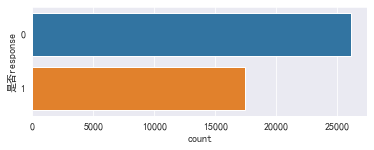

In [21]:
import seaborn as sns

# 中文处理
sns.set_style('darkgrid',{'font.sans-serif':['simhei','Droid Sans Fallback']})
#sns.set()

plt.figure(1,figsize=(6,2))
sns.countplot(y='是否response',data=data0_4)
plt.show()

<AxesSubplot:xlabel='年龄', ylabel='Density'>

<AxesSubplot:xlabel='年龄', ylabel='Density'>

<AxesSubplot:xlabel='年龄', ylabel='Density'>

(60.0, 90.0)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Density')

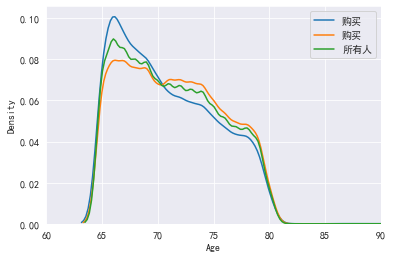

In [22]:
# 根据年龄 概率密度图
sns.kdeplot(data0_4.年龄[data0_4.是否response==1],label='购买')
sns.kdeplot(data0_4.年龄[data0_4.是否response==0],label='购买')
sns.kdeplot(data0_4.年龄.dropna(),label='所有人')

plt.xlim([60,90])
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

### 探索家庭成员字段信息

In [23]:
data5_22 = chinese(data_01[feature_dict.变量名[5:23].tolist()])
data5_22.head()

,是否有小孩,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,家庭小孩个数,家庭成年人个数,家庭成员人数量,是否有家庭成员小于18岁,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,家里是否有老人
0,Y,4,0,5,1,1,5,3,8,N,N,N,Y,N,N,Y,Y,Y
1,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
2,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
3,Y,0,4,0,0,0,1,4,5,N,N,N,N,Y,Y,N,Y,Y
4,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N


In [24]:
fre(data5_22)

字段名: 是否有小孩
---------------------------------------------
数据类型: object
---------------------------------------------
U    24500
Y    10225
P     8941
Name: 是否有小孩, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 小孩是否在0-2岁之间
---------------------------------------------
数据类型: int64
---------------------------------------------
0    40677
4     2856
1       57
2       48
3       16
6        9
5        3
Name: 小孩是否在0-2岁之间, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 小孩是否在3-5岁之间
---------------------------------------------
数据类型: int64
---------------------------------------------
0    41087
4     2068
1      204
2      202
3       45
5       30
6       29
7        1
Name: 小孩是否在3-5岁之间, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 小孩是否在6-10岁之间
---------------------------

### 探索疾病相关数据

In [25]:
data23_35 = chinese(data_01[feature_dict.变量名[23:35].tolist()])
data23_35.head()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
0,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N,N,N,N


In [26]:
fre(data23_35)

字段名: 是否有关节炎
---------------------------------------------
数据类型: object
---------------------------------------------
N    38369
Y     5297
Name: 是否有关节炎, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否有糖尿病
---------------------------------------------
数据类型: object
---------------------------------------------
N    40554
Y     3112
Name: 是否有糖尿病, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否有抑郁症
---------------------------------------------
数据类型: object
---------------------------------------------
N    41674
Y     1992
Name: 是否有抑郁症, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否有高血压
---------------------------------------------
数据类型: object
---------------------------------------------
N    38102
Y     5564
Name: 是否有高血压, dtype: int64
---------------------------

In [27]:
# 自定义0 1 转码方法
def zero_one(x):
    for i in x.columns:
        if x[i].dtype == 'object':
            dic = dict(zip(list(x[i].value_counts().index),range(x[i].nunique())))
            x[i] = x[i].map(dic)
    return x

In [28]:
zero_one(data23_35).corr()  # 相关性分析

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
是否有关节炎,1.000000,0.446458,0.414955,0.632994,0.638905,0.478167,0.403263,0.669722,0.670945,0.356717,0.432069,0.570546
是否有糖尿病,0.446458,1.000000,0.306319,0.499331,0.485837,0.341276,0.360596,0.447038,0.453943,0.273800,0.283378,0.386641
是否有抑郁症,0.414955,0.306319,1.000000,0.393726,0.403696,0.379312,0.315257,0.411868,0.432201,0.275739,0.303972,0.346339
是否有高血压,0.632994,0.499331,0.393726,1.000000,0.719111,0.441706,0.436309,0.648784,0.651767,0.348651,0.397823,0.562810
胆固醇含量是否过高,0.638905,0.485837,0.403696,0.719111,1.000000,0.446039,0.426180,0.681824,0.690814,0.353627,0.413284,0.633716
是否有呼吸疾病,0.478167,0.341276,0.379312,0.441706,0.446039,1.000000,0.315187,0.497713,0.483421,0.282426,0.336810,0.414359
是否有心脏病,0.403263,0.360596,0.315257,0.436309,0.426180,0.315187,1.000000,0.372830,0.381817,0.348280,0.208320,0.269672
是否有过敏性鼻炎,0.669722,0.447038,0.411868,0.648784,0.681824,0.497713,0.372830,1.000000,0.732883,0.357085,0.484138,0.640638
是否有消化不良,0.670945,0.453943,0.432201,0.651767,0.690814,0.483421,0.381817,0.732883,1.000000,0.355564,0.450049,0.639802
是否耳聋,0.356717,0.273800,0.275739,0.348651,0.353627,0.282426,0.348280,0.357085,0.355564,1.000000,0.219128,0.274512


<AxesSubplot:>

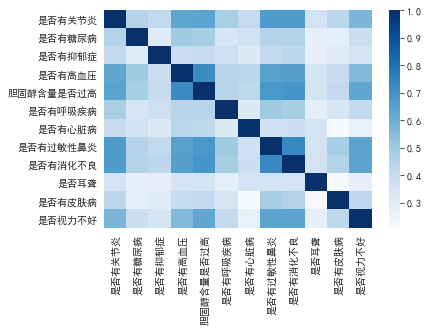

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 画热力图
sns.heatmap(zero_one(data23_35).corr(),cmap='Blues')

#### 自定义函数筛选相关性高于某个值的字段

筛选相关性高于0.65的字段

In [30]:
def high_cor(x,y=0.65):
    data_cor = (x.corr()>y)
    a = []
    
    for i in data_cor.columns:
        if data_cor[i].sum()>=2:
            a.append(i)
    
    return a # 这些是我们要考虑删除的

In [31]:
high_cor(data23_35) # 是否有关节炎 胆固醇含量是否过高 是否有过敏性鼻炎

['是否有关节炎', '是否有高血压', '胆固醇含量是否过高', '是否有过敏性鼻炎', '是否有消化不良']

### 探索投资相关字段

In [32]:
data35_41 = chinese(data_01[feature_dict.变量名[35:41].tolist()])
data35_41.head()

,是否有过破产记录,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否有投资
0,N,N,N,N,N,N
1,N,N,N,N,N,N
2,N,N,N,N,N,N
3,Y,N,N,N,N,N
4,N,Y,N,N,N,N


In [33]:
fre(data35_41)

字段名: 是否有过破产记录
---------------------------------------------
数据类型: object
---------------------------------------------
N    40599
Y     3067
Name: 是否有过破产记录, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否大学毕业
---------------------------------------------
数据类型: object
---------------------------------------------
N    39236
Y     4422
Name: 是否大学毕业, dtype: int64
---------------------------------------------
缺失值个数： 8
---------------------------------------------


字段名: 是否用过保险服务
---------------------------------------------
数据类型: object
---------------------------------------------
N    42793
Y      873
Name: 是否用过保险服务, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否投资过寿险
---------------------------------------------
数据类型: object
---------------------------------------------
N    35871
Y     7795
Name: 是否投资过寿险, dtype: int64
-----------------

<AxesSubplot:>

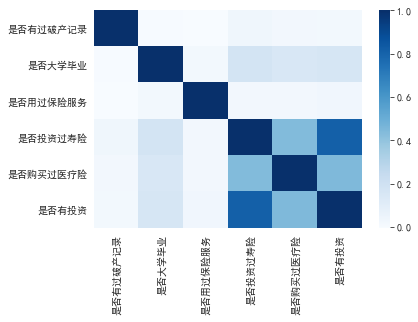

In [34]:
sns.heatmap(zero_one(data35_41).corr(),cmap='Blues')

In [35]:
high_cor(data35_41) # 是否有投资 删除

['是否投资过寿险', '是否有投资']

### 探索生活习惯

In [36]:
# 将41-51列数据取出来并进行翻译
data41_51 = chinese(data_01[feature_dict.变量名[41:51].tolist()])
data41_51.head()

,是否网上购买过产品,是否通过快递买过东西,所处的县的大小,是否上网,是否喜欢美术,是否经常有奢侈消费,是否经常户外活动,是否喜欢运动,是否热爱科技,幸福指数
0,N,S,A,Y,N,N,N,N,N,1.0
1,N,P,A,N,N,N,N,N,N,4.0
2,N,M,A,Y,N,N,N,N,N,3.0
3,N,S,B,Y,N,N,N,N,N,1.0
4,Y,M,B,Y,Y,Y,N,Y,Y,3.0


In [37]:
fre(data41_51)

字段名: 是否网上购买过产品
---------------------------------------------
数据类型: object
---------------------------------------------
N    36197
Y     7469
Name: 是否网上购买过产品, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 是否通过快递买过东西
---------------------------------------------
数据类型: object
---------------------------------------------
M    27450
S     9947
U     3912
P     2350
Name: 是否通过快递买过东西, dtype: int64
---------------------------------------------
缺失值个数： 7
---------------------------------------------


字段名: 所处的县的大小
---------------------------------------------
数据类型: object
---------------------------------------------
A    26539
B    12687
C     3823
D      607
Name: 所处的县的大小, dtype: int64
---------------------------------------------
缺失值个数： 10
---------------------------------------------


字段名: 是否上网
---------------------------------------------
数据类型: object
---------------------------------------------
Y    28473
N    1

<AxesSubplot:xlabel='N2NCY', ylabel='count'>

Text(0.5, 0, '县的大小')

Text(0, 0.5, '购买数量')

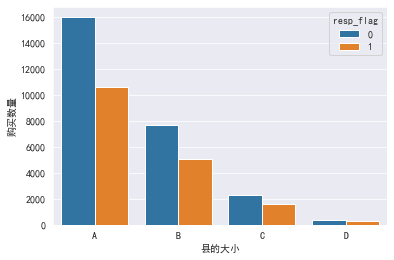

In [38]:
sns.countplot(x='N2NCY',hue='resp_flag',data=data_01)
plt.xlabel('县的大小')
plt.ylabel('购买数量')

### 探索家庭收入情况

In [39]:
# 将51-59列数据取出来并进行翻译
data51_59 = chinese(data_01[feature_dict.变量名[51:59].tolist()])
data51_59.head()

,是否有房子,是否有医保补贴,收入所处排名,普查家庭有效购买收入,家庭收入,家庭房屋价值,社会经济地位评分,家庭自成立日起的时间
0,Y,C,74.0,71,90.0,738.0,111,64.0
1,Y,U,69.0,69,84.0,494.0,97,56.0
2,Y,U,32.0,44,50.0,516.0,83,50.0
3,Y,C,82.0,82,103.0,473.0,105,52.0
4,U,A,38.0,47,55.0,523.0,89,50.0


In [40]:
fre(data51_59)

字段名: 是否有房子
---------------------------------------------
数据类型: object
---------------------------------------------
Y    31478
U     4747
P     4604
R     2623
T      204
Name: 是否有房子, dtype: int64
---------------------------------------------
缺失值个数： 10
---------------------------------------------


字段名: 是否有医保补贴
---------------------------------------------
数据类型: object
---------------------------------------------
U    21612
C     8972
A     6765
B     6306
Name: 是否有医保补贴, dtype: int64
---------------------------------------------
缺失值个数： 11
---------------------------------------------


字段名: 收入所处排名
---------------------------------------------
数据类型: float64
---------------------------------------------
79.0    713
61.0    648
55.0    647
82.0    636
88.0    607
       ... 
25.0    258
46.0    254
17.0    246
23.0    225
42.0    162
Name: 收入所处排名, Length: 99, dtype: int64
---------------------------------------------
缺失值个数： 2
---------------------------------------------


字段名: 普查家庭有效购买

<AxesSubplot:>

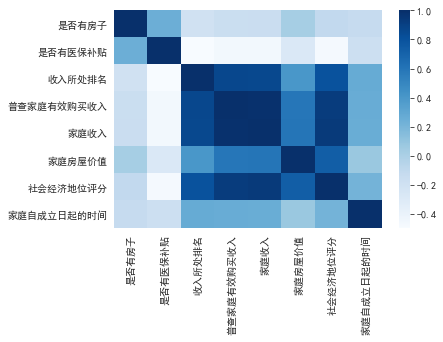

In [41]:
sns.heatmap(zero_one(data51_59).corr(),cmap='Blues')

In [42]:
high_cor(data51_59) # 保留普查家庭有效购买收入 其余删除

['收入所处排名', '普查家庭有效购买收入', '家庭收入', '家庭房屋价值', '社会经济地位评分']

### 探索所处地区情况

In [43]:
# 将59列之后数据取出来并进行翻译
data59 = chinese(data_01[feature_dict.变量名[59:].tolist()])
data59.head()

,该客户被多少个名单source 包含,所处的省份,贫穷以上人的比例,所处地区有多少居住小区在2000年及以后建立,所处地区蓝领所占百分比,贫穷以下人的比例,所处地区mobile home的比例,离婚或者分居人群所占比例,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,Individual ID,所在地区处方药计划覆盖的比例,zip level的家庭收入排名
0,8,CA,99,11.0,10,1,0,14,52,65,71.0,22,79.0,15.0,281478,42,8
1,6,CA,98,6.0,15,2,0,15,44,81,99.0,37,65.0,17.0,290485,46,3
2,7,CA,88,NaN,26,12,0,17,38,44,62.0,44,47.0,20.0,299949,46,3
3,8,CA,96,NaN,15,4,0,14,45,71,99.0,39,71.0,4.0,314635,37,9
4,4,CA,88,NaN,9,12,10,29,32,13,36.0,15,65.0,9.0,363702,37,3


In [44]:
fre(data59)

字段名: 该客户被多少个名单source 包含
---------------------------------------------
数据类型: int64
---------------------------------------------
8     4168
9     4152
10    4131
7     3878
11    3735
6     3654
5     3400
4     3144
3     3044
12    3038
2     2229
13    2017
14    1243
1      728
15     630
16     310
17     104
18      48
19      13
Name: 该客户被多少个名单source 包含, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 所处的省份
---------------------------------------------
数据类型: object
---------------------------------------------
CA    11700
OH     8959
NY     6481
IN     4954
CT     2873
MO     2202
WI     1884
GA     1687
KY     1375
NH      904
ME      647
Name: 所处的省份, dtype: int64
---------------------------------------------
缺失值个数： 0
---------------------------------------------


字段名: 贫穷以上人的比例
---------------------------------------------
数据类型: int64
---------------------------------------------
99    4081
98    3624
97  

<AxesSubplot:xlabel='STATE_NAME', ylabel='count'>

Text(0.5, 0, '所处省份')

Text(0, 0.5, '购买数量')

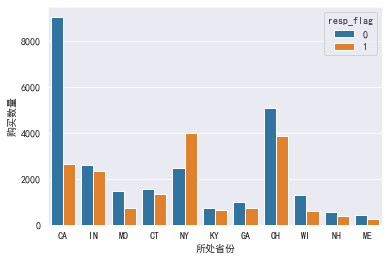

In [45]:
sns.countplot(x='STATE_NAME',hue='resp_flag',data=data_01)
plt.xlabel('所处省份')
plt.ylabel('购买数量')

<AxesSubplot:>

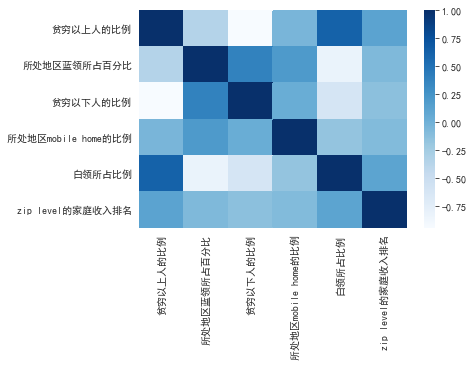

In [46]:
a = chinese(data_01[['c210apvt','c210blu','c210bpvt','c210mob','c210wht','zhip19']])
sns.heatmap(a.corr(),cmap='Blues')

In [47]:
high_cor(data59)

['贫穷以上人的比例', '已婚人群所占比例', '有房子人所占比例', '独宅住户所占比例']

<AxesSubplot:>

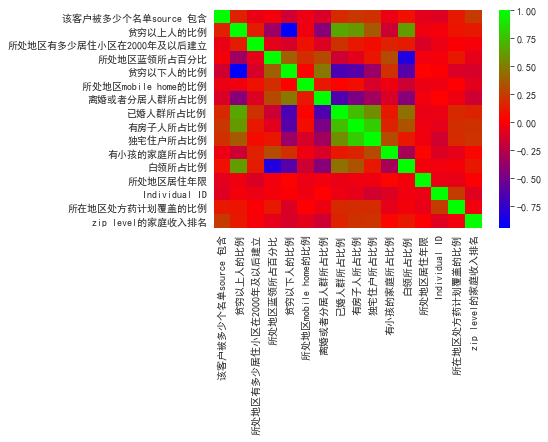

In [48]:
sns.heatmap(data59.corr(),cmap='brg')

## 数据清洗

In [49]:
data_02 = data_01.copy()
data_02.shape

(43666, 76)

### 删除特征

In [50]:
del_col = ['KBM_INDV_ID','U18','POEP','AART','AHCH','AASN','COLLEGE','INVE','c210cip'
            ,'c210hmi','c210hva','c210kses','c210blu','c210bpvt','c210poo','KBM_INDV_ID','meda']

In [51]:
data_02 = data_02.drop(columns=del_col)
data_02.shape

(43666, 60)

### 删除重复值

In [52]:
data_02.drop_duplicates().shape

(43666, 60)

### 划分训练集与测试集

一定要先划分数据集，在进行填充、转码

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
y = data_02.pop('resp_flag') # 标签
X= data_02 # 特征

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=100)

In [57]:
Xtrain_01 = Xtrain.copy()
Xtest_01 = Xtest.copy()
Ytrain_01 = Ytrain.copy()
Ytest_01 = Ytest.copy()

### 填充缺失值

#### 填充中位数

In [58]:
# 中位数填充
fil = ['age','c210mah','c210b200','c210psu','c210wht','ilor']
Xtrain_01[fil].median()

age         71.0
c210mah     53.0
c210b200    10.0
c210psu     77.0
c210wht     61.0
ilor        15.0
dtype: float64

In [61]:
dic = dict(zip(Xtrain_01[fil].median().index,Xtrain_01[fil].median()))
dic

{'age': 71.0,
 'c210mah': 53.0,
 'c210b200': 10.0,
 'c210psu': 77.0,
 'c210wht': 61.0,
 'ilor': 15.0}

In [62]:
# 训练集中填充中位数
Xtrain_01 = Xtrain_01.fillna(dic)

#### 填充众数

In [67]:
mod = ['N1819','ASKN','MOBPLUS','N2NCY','LIVEWELL','HOMSTAT','HINSUB']

dic_mod = dict(zip(Xtrain_01[mod].mode().columns,Xtrain_01[mod].iloc[0,:]))
Xtrain_01 = Xtrain_01.fillna(dic_mod)

In [66]:
Xtrain_01[mod].mode()

,N1819,ASKN,MOBPLUS,N2NCY,LIVEWELL,HOMSTAT,HINSUB
0,N,N,M,A,4.0,Y,U


#### 替换填充

In [68]:
Xtrain_01['N6064'] = Xtrain_01['N6064'].replace('0','N') # 0替换成N

#### 验证填充效果

In [70]:
Xtrain_01.isnull().sum()[Xtrain_01.isnull().sum() != 0]

Series([], dtype: int64)

### 对测试集进行填充（总结）

In [127]:
# 需要填充的字段
fil = ['age','c210mah','c210b200','c210psu','c210wht','ilor']

#填充中位数--测试集
dic = dict(zip(Xtest_01[fil].median().index,Xtest_01[fil].median()))

Xtest_01 = Xtest_01.fillna(dic)

# 填充众数--测试集
mod = ['N1819','ASKN','MOBPLUS','N2NCY','LIVEWELL','HOMSTAT','HINSUB']

dic_mod = dict(zip(Xtest_01[mod].mode().columns,Xtest_01[mod].iloc[0,:]))
Xtest_01 = Xtest_01.fillna(dic_mod)

#替换填充
Xtest_01['N6064'] = Xtest_01['N6064'].replace('0','N') # 0替换成N

# 测试
Xtest_01.isnull().sum()[Xtest_01.isnull().sum() != 0]

Series([], dtype: int64)

## 转码

In [71]:
encode_col = pd.read_excel('./保险案例数据字典_清洗.xlsx',sheet_name=2)
encode_col.head()

,变量名,转
0,GEND,0-1
1,c210mys,哑变量
2,POC19,哑变量
3,N1819,0-1
4,N2029,0-1


### 查看训练集中object 类型

In [72]:
object_tr = Xtrain_01.describe(include='O').columns
object_tr

Index(['GEND', 'ADBT', 'ADEP', 'AHBP', 'ARES', 'AHRT', 'ADGS', 'AHRL', 'ASKN',
       'AVIS', 'BANK', 'FINI', 'INLI', 'INMEDI', 'IOLP', 'MOBPLUS', 'N2NCY',
       'N1819', 'N2029', 'N3039', 'N4049', 'N5059', 'N6064', 'N65P', 'ONLA',
       'SGFA', 'SGLL', 'SGOE', 'SGSE', 'SGTC', 'POC19', 'HOMSTAT', 'HINSUB',
       'STATE_NAME'],
      dtype='object')

In [73]:
# 检查转码目标是否出现
np.setdiff1d(object_tr,encode_col['变量名'])

array([], dtype=object)

### 0-1转码 

In [75]:
# 获取0-1转码的变量名
z_0_list = encode_col[encode_col['转']== '0-1'].变量名
z_0_list.head()

0     GEND
3    N1819
4    N2029
5    N3039
6    N4049
Name: 变量名, dtype: object

In [76]:
Xtrain02 = Xtrain_01[z_0_list]
Xtrain02.head()

,GEND,N1819,N2029,N3039,N4049,N5059,N6064,N65P,ADBT,ADEP,...,FINI,INLI,INMEDI,IOLP,ONLA,SGFA,SGLL,SGOE,SGSE,SGTC
18001,M,N,N,Y,Y,N,N,Y,N,N,...,N,N,N,N,Y,N,N,N,N,N
22763,F,N,N,N,N,N,Y,Y,N,N,...,N,N,N,Y,Y,Y,N,N,Y,Y
40488,F,N,N,N,N,Y,N,Y,N,N,...,N,Y,Y,Y,Y,Y,Y,Y,Y,Y
22585,F,N,N,N,N,N,N,Y,N,N,...,N,N,N,N,Y,N,N,N,N,N
12204,M,N,N,Y,N,Y,N,Y,N,N,...,N,N,N,N,Y,N,Y,N,Y,Y


In [77]:
from sklearn.preprocessing import OrdinalEncoder # sklearn预处理模块

new_arr = OrdinalEncoder().fit_transform(Xtrain02)

new_arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

In [81]:
# 数据替换 添加表头和索引
Xtrain02 = pd.DataFrame(data=new_arr,columns=Xtrain02.columns,index=Xtrain02.index)
Xtrain02.head()

,GEND,N1819,N2029,N3039,N4049,N5059,N6064,N65P,ADBT,ADEP,...,FINI,INLI,INMEDI,IOLP,ONLA,SGFA,SGLL,SGOE,SGSE,SGTC
18001,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
40488,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12204,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


将转好的 Xtrain_02 替换原来的 Xtrain_01

In [82]:
Xtrain_01[z_0_list] = Xtrain02
Xtrain_01.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys,c210pdv,c210pmr,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,15,56,75.0,33,66.0,33.0,55,12,9
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,4,10,50,78.0,42,56.0,6.0,69,3,1
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,4,17,51,82.0,40,54.0,19.0,81,12,4
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,26,30,29.0,16,66.0,3.0,66,7,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,6,17,61,99.0,34,83.0,16.0,70,13,7


### 哑变量转码

pandas dummies  
sklearn one-hot

#### 例子

In [84]:
a = pd.DataFrame(['本科','硕士','博士'])
a

,0
0,本科
1,硕士
2,博士


In [85]:
pd.get_dummies(a)

,0_博士,0_本科,0_硕士
0,0,1,0
1,0,0,1
2,1,0,0


In [86]:
# 如果是数值类型 无法转码 需要先进行字符化处理

#### 哑变量转码

In [89]:
# 获取哑变量--转码的变量名
o_h_list = encode_col[encode_col['转'] == '哑变量'].变量名
o_h_list

1        c210mys
2          POC19
24       MOBPLUS
25         N2NCY
32      LIVEWELL
33       HOMSTAT
34        HINSUB
35    STATE_NAME
Name: 变量名, dtype: object

In [90]:
Xtrain_01[o_h_list].head()

,c210mys,POC19,MOBPLUS,N2NCY,LIVEWELL,HOMSTAT,HINSUB,STATE_NAME
18001,4,P,M,A,4.0,Y,U,OH
22763,4,P,M,B,4.0,R,A,IN
40488,4,P,M,A,1.0,Y,U,NH
22585,3,U,M,C,2.0,Y,A,ME
12204,6,Y,M,B,1.0,Y,U,KY


In [114]:
o_h_01 = ['c210mys','LIVEWELL'] # 非字符类型
o_h_02 = [i for i in o_h_list if i not in o_h_01] # 字符类型的变量

# 先转字符的
Xtrain_02 = Xtrain_01.copy()
chinese(Xtrain_02[o_h_02]).head()

,是否有小孩,是否通过快递买过东西,所处的县的大小,是否有房子,是否有医保补贴,所处的省份
18001,P,M,A,Y,U,OH
22763,P,M,B,R,A,IN
40488,P,M,A,Y,U,NH
22585,U,M,C,Y,A,ME
12204,Y,M,B,Y,U,KY


In [118]:
Xtrain_02 = pd.get_dummies(chinese(Xtrain_01[o_h_02]))
Xtrain_02.head()

,是否有小孩_P,是否有小孩_U,是否有小孩_Y,是否通过快递买过东西_M,是否通过快递买过东西_P,是否通过快递买过东西_S,是否通过快递买过东西_U,所处的县的大小_A,所处的县的大小_B,所处的县的大小_C,...,所处的省份_CT,所处的省份_GA,所处的省份_IN,所处的省份_KY,所处的省份_ME,所处的省份_MO,所处的省份_NH,所处的省份_NY,所处的省份_OH,所处的省份_WI
18001,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
22763,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
40488,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
22585,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
12204,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [104]:
# 转o_h_01
Xtrain_03 = Xtrain_01.copy()

# 转成字符类型
Xtrain_03 = Xtrain_03[o_h_01].astype(str)
# 转化覆盖
Xtrain_03 = pd.get_dummies(chinese(Xtrain_03[o_h_01]))

Xtrain_03.head()

,学历_0,学历_1,学历_2,学历_3,学历_4,学历_5,学历_6,学历_7,学历_8,幸福指数_1.0,幸福指数_2.0,幸福指数_3.0,幸福指数_4.0,幸福指数_6.0
18001,0,0,0,0,1,0,0,0,0,0,0,0,1,0
22763,0,0,0,0,1,0,0,0,0,0,0,0,1,0
40488,0,0,0,0,1,0,0,0,0,1,0,0,0,0
22585,0,0,0,1,0,0,0,0,0,0,1,0,0,0
12204,0,0,0,0,0,0,1,0,0,1,0,0,0,0


Xtrain_02 Xtrain_03 是转好的  
先删除原字段 再将转码好的插入数据集中

In [124]:
# Xtrain_04删除原转码的字段
Xtrain_04 = Xtrain_01.copy()
Xtrain_04 = chinese(Xtrain_04.drop(columns = o_h_01+o_h_02))

Xtrain_04.head()

,性别,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,是否有糖尿病,是否有抑郁症,是否有高血压,是否有呼吸疾病,...,所处地区mobile home的比例,离婚或者分居人群所占比例,已婚人群所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,所在地区处方药计划覆盖的比例,该客户被多少个名单source 包含,zip level的家庭收入排名
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,15,56,75.0,33,66.0,33.0,55,12,9
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,0,10,50,78.0,42,56.0,6.0,69,3,1
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,12,17,51,82.0,40,54.0,19.0,81,12,4
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,26,30,29.0,16,66.0,3.0,66,7,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,0,17,61,99.0,34,83.0,16.0,70,13,7


In [110]:
Xtrain_04.shape

(30566, 51)

In [120]:
Xtrain_02.shape # 字符的哑变量

(30566, 31)

In [108]:
Xtrain_03.shape # 非字符的哑变量

(30566, 14)

In [125]:
# 将Xtrain_04 Xtrain_02 Xtrain_03 合并
Xtrain_05 = pd.concat([Xtrain_04,Xtrain_02,Xtrain_03],axis=1)
Xtrain_05.shape

(30566, 96)

In [126]:
Xtrain_05.head()

,性别,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,是否有糖尿病,是否有抑郁症,是否有高血压,是否有呼吸疾病,...,学历_4,学历_5,学历_6,学历_7,学历_8,幸福指数_1.0,幸福指数_2.0,幸福指数_3.0,幸福指数_4.0,幸福指数_6.0
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0


### 对测试集进行转码（总结）

#### 0-1转码

In [128]:
# 获取需要转码的字段
encode_col = pd.read_excel('./保险案例数据字典_清洗.xlsx',sheet_name=2)

# 查看Xtest_01 中的object类型
object_tr = Xtest_01.describe(include='O').columns

# 检查转码目标是否出现
np.setdiff1d(object_tr,encode_col['变量名'])

# 01转码
# 获取0-1转码的变量名
z_0_list = encode_col[encode_col['转']== '0-1'].变量名
Xtest_02 = Xtest_01[z_0_list]

new_arr = OrdinalEncoder().fit_transform(Xtest_02)
# 数据替换 添加表头和索引
Xtest_02 = pd.DataFrame(data=new_arr,columns=Xtest_02.columns,index=Xtest_02.index)

Xtest_01[z_0_list] = Xtest_02
Xtest_01.head()

array([], dtype=object)

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys,c210pdv,c210pmr,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
20753,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,16,28,22.0,40,49.0,22.0,47,5,0
20558,1.0,4,0,0,4,4,0.0,0.0,0.0,0.0,...,6,6,69,88.0,44,84.0,16.0,63,9,5
22118,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,12,64,81.0,40,52.0,8.0,87,7,0
581,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,17,51,85.0,30,79.0,15.0,62,11,3
16829,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,5,17,40,59.0,15,75.0,13.0,61,13,8


#### 哑变量转码

In [132]:
# 获取哑变量--转码的变量名
o_h_list = encode_col[encode_col['转'] == '哑变量'].变量名

o_h_01 = ['c210mys','LIVEWELL'] # 非字符类型
o_h_02 = [i for i in o_h_list if i not in o_h_01] # 字符类型的变量

# 先转字符的
Xtest_02 = Xtest_01.copy()

Xtest_02 = pd.get_dummies(chinese(Xtest_01[o_h_02]))

# 转o_h_01
Xtest_03 = Xtest_01.copy()

# 转成字符类型
Xtest_03 = Xtest_03[o_h_01].astype(str)
# 转化覆盖
Xtest_03 = pd.get_dummies(chinese(Xtest_03[o_h_01]))


# Xtrain_04删除原转码的字段
Xtest_04 = Xtest_01.copy()
Xtest_04 = chinese(Xtest_04.drop(columns = o_h_01+o_h_02))

# 将Xtrain_04 Xtrain_02 Xtrain_03 合并
Xtest_05 = pd.concat([Xtest_04,Xtest_02,Xtest_03],axis=1)
Xtest_05.shape

(13100, 96)

In [133]:
Xtest_05.head()

,性别,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,是否有糖尿病,是否有抑郁症,是否有高血压,是否有呼吸疾病,...,学历_4,学历_5,学历_6,学历_7,学历_8,幸福指数_1.0,幸福指数_2.0,幸福指数_3.0,幸福指数_4.0,幸福指数_6.0
20753,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
20558,1.0,4,0,0,4,4,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
22118,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
581,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
16829,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


## 初步建模

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=420,class_weight='balanced')
cvs = cross_val_score(clf,Xtrain_05,Ytrain)

In [135]:
cvs.mean()

0.5993914576104883

### 网格搜索寻找最优参数

In [137]:
from sklearn.model_selection import GridSearchCV

# 测试参数
param_test = {
    'splitter': ('best','random'),
    'criterion':('gini','entropy'), #  基尼 信息熵
    'max_depth':range(3,15),
    #'min_samples_leaf':(1,50,5),
    
}

gsearch = GridSearchCV(estimator=clf, # 对应模型
                         param_grid=param_test, # 要找的最优参数
                         scoring='roc_auc',# 准确度评估标准
                         n_jobs=-1, # CPU 并行数
                         cv=5, # 交叉验证 折的次数
                         iid=False, # 默认True  各个样本分布的分布一致
                         verbose=2 # 输出训练过程                
                         )
gsearch.fit(Xtrain_05,Ytrain_01)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   34.4s finished
D:\Program Files\Anaconda3-2020.11\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=420),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(3, 15),
                         'splitter': ('best', 'random')},
             scoring='roc_auc', verbose=2)

In [138]:
# 优化期间观察到最好的评分
gsearch.best_score_

0.691856415170639

In [139]:
gsearch.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

## 模型评估

In [141]:
from sklearn.metrics import accuracy_score # 准确率
from sklearn.metrics import precision_score # 请准率
from sklearn.metrics import recall_score # 召回率
from sklearn.metrics import roc_curve 


In [142]:
y_pre = gsearch.predict(Xtest_05)

In [143]:
accuracy_score(Ytest,y_pre)

0.6090076335877863

In [144]:
precision_score(Ytest,y_pre)

0.5100116264048572

In [145]:
recall_score(Ytest,y_pre)

0.748152359295054

In [146]:
fpr,tpr,thresholds = roc_curve(Ytest,y_pre)

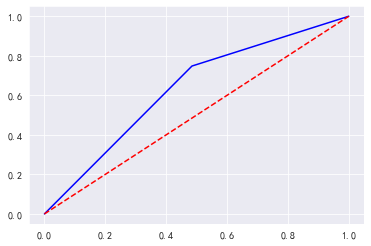

In [147]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,c='b',label='roc曲线')
plt.plot(fpr,fpr,c='r',ls='--')

## 输出规则

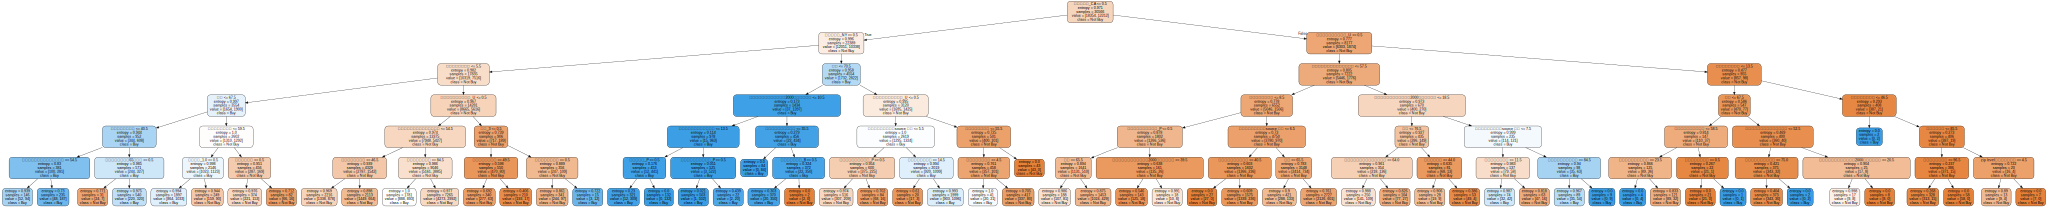

In [152]:
# 最优参数
#{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# 将最优参数放到分类器
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter='best')
clf = clf.fit(Xtrain_05,Ytrain)

# 输出树模型
features = Xtest_05.columns
dot_data = tree.export_graphviz(clf,
                                feature_names=features,
                                class_names=['Not Buy','Buy'],
                                filled=True,
                                rounded=True,
                                leaves_parallel=False)

graph = graphviz.Source(dot_data)
graph.render('tree') #输出pdf
graph